In [1]:
from pathlib import Path
#import scanpy as sc
#import cell2location
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

DPI = 300
FONTSIZE = 20  # 42
#sc.settings.set_figure_params(
    #scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
#)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

#from vistools import utils

import scikit_posthocs

import seaborn as sns
custom_params = {"font.size": FONTSIZE, "figure.dpi": 100, "savefig.dpi": DPI}
sns.set_theme(style="ticks", rc=custom_params)


In [2]:
SAMPLE_NAME = "concat-no_normal"

In [3]:
# store results
DIR2SAVE = Path(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/public/Visium_Ozato_2023/cell2loc_spatialde2/{SAMPLE_NAME}/microenvs_geneexp/gene_signatures/"
)  # to change
DIR2SAVE.mkdir(parents=True, exist_ok=True)

# figures
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [4]:
df = pd.read_csv(DIR2SAVE.joinpath('cell2loc_gene_signature_scores_microenvs.csv'),
                 sep='\t',
                 header=0,
                 index_col=0
                )

In [5]:
df_melt = pd.melt(df.reset_index(), 
                             id_vars=['index', 'Sample', 'segmentation_labels'], 
                             value_vars=['MP6 Hypoxia', 'MP12 EMT-I', 'MP13 EMT-II', 
                                         'MP14 EMT-III ', 'MP15 EMT IV', 'MP17 Interferon', 
                                         'MP18 Interferon', 'EpiHR', 'TME_HR', 'CRISB'],
                             var_name='Gene signatures', 
                             value_name='Score')

In [6]:
# subset to certain microenvironments:
df_melt = df_melt[df_melt['segmentation_labels'].isin([1, 4, 6])].copy() # 7# remove 2 potentially

In [7]:
df_melt.segmentation_labels = df_melt.segmentation_labels.astype('int').astype('category')

In [8]:
palette_subset = [
    #"#fb8072", #0
    "#67a9cf", #1
    #"#b3ffff", #2
    #"#e78ac3", #3
    "#91cf60", #4
    #"#feed8b", #5
    "#1f78b4", #6
    #"#fccde5", #7 #f4c9e4
    #"#fdb462", #8 
] 

### Statistical test of significance

1. lets's do Kruskal-Wallis
2. As follow up- Post-hoc test: Dunn
Multiple hypothesis correction was used in the post-hoc Dunn test


-- MP6 Hypoxia
645.4996355366493 6.784769656884594e-141


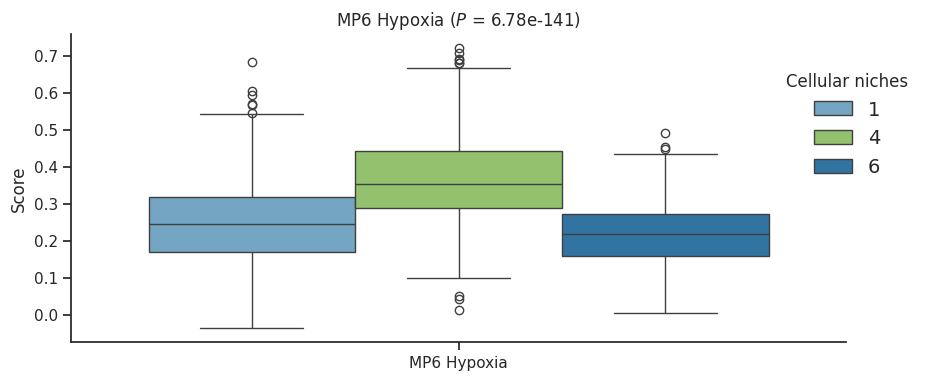

-- MP12 EMT-I
834.1309098540878 7.426331519764345e-182


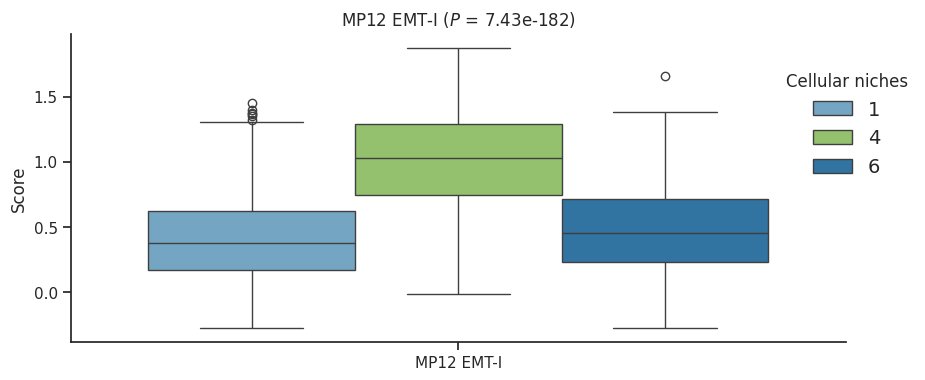

-- MP13 EMT-II
1462.3923575416975 0.0


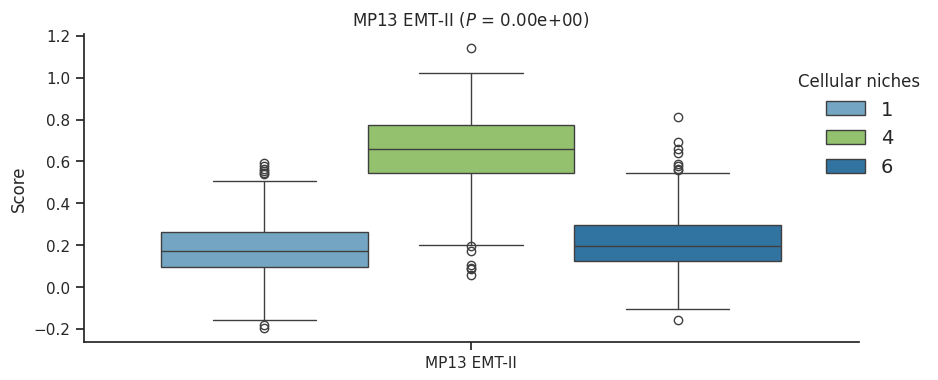

-- MP14 EMT-III 
1193.8330288632933 5.786975256076803e-260


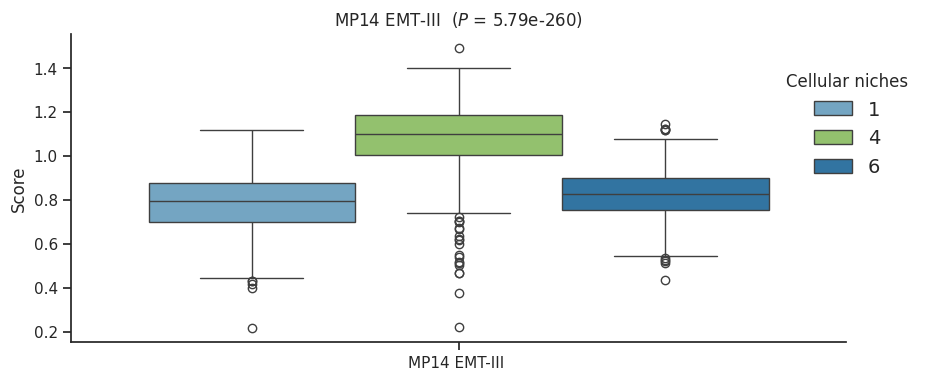

-- MP15 EMT IV
840.3923276503447 3.2443278438019347e-183


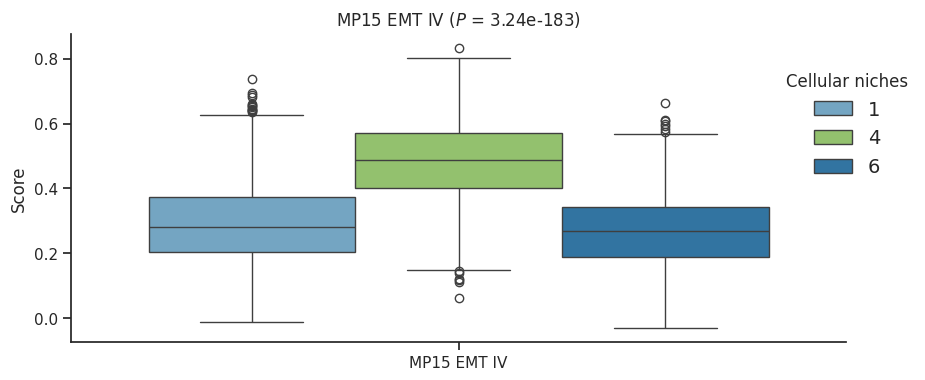

-- MP17 Interferon
1011.5458620060872 2.216189889998762e-220


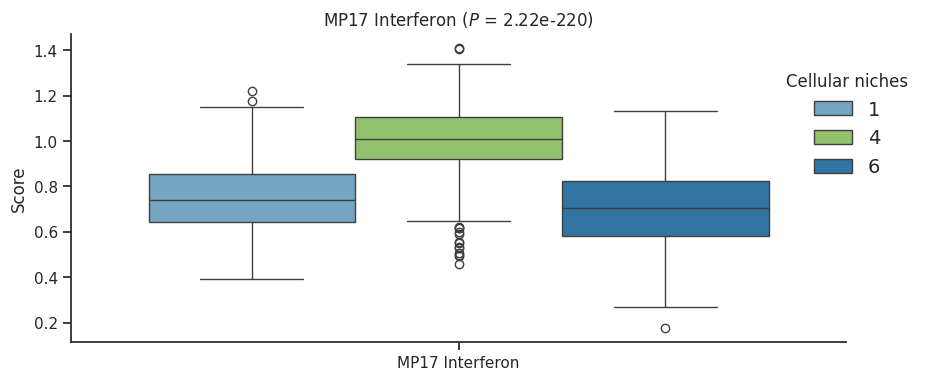

-- MP18 Interferon
1201.495637212216 1.2546926790405146e-261


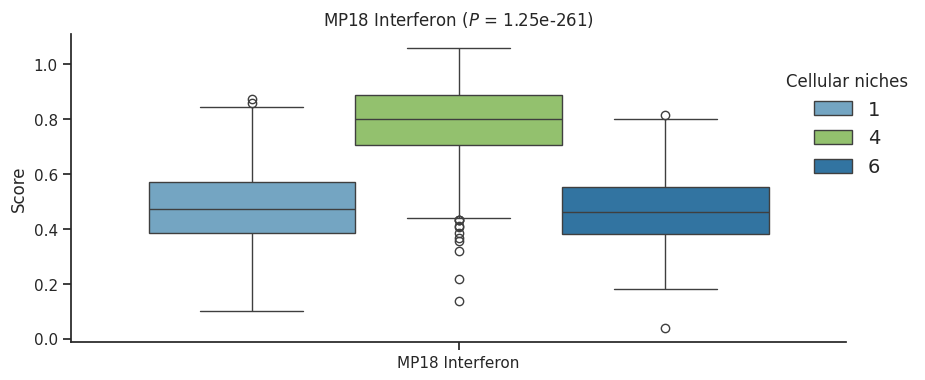

-- EpiHR
993.6732794584732 1.684957527874159e-216


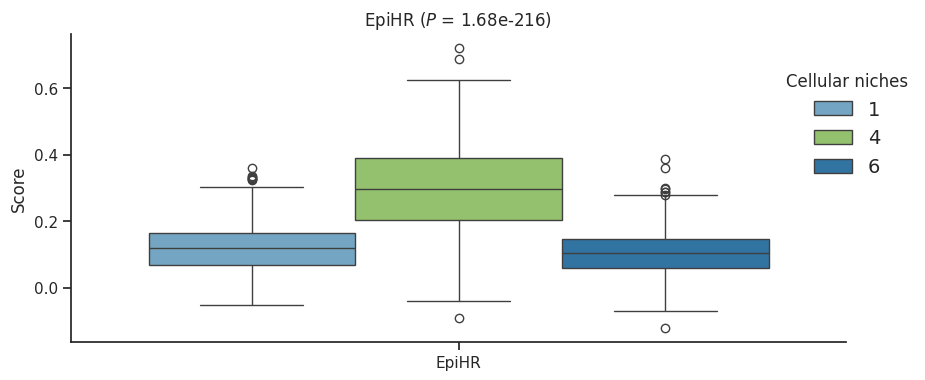

-- TME_HR
1320.2372507937926 2.0612163967521952e-287


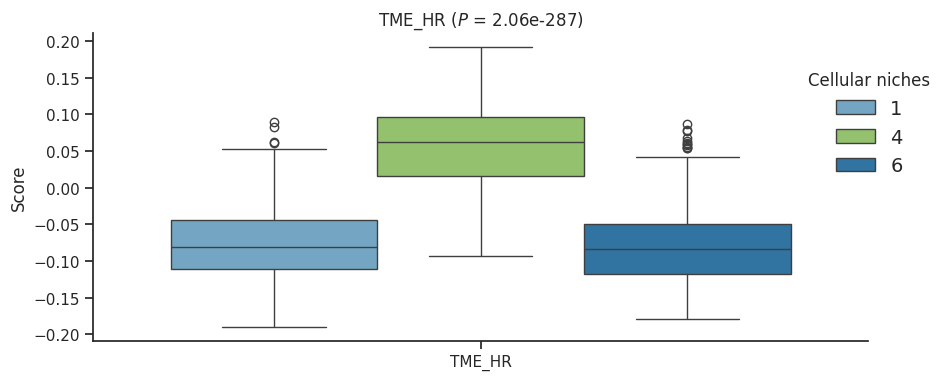

-- CRISB
1324.263887928908 2.7526465145653515e-288


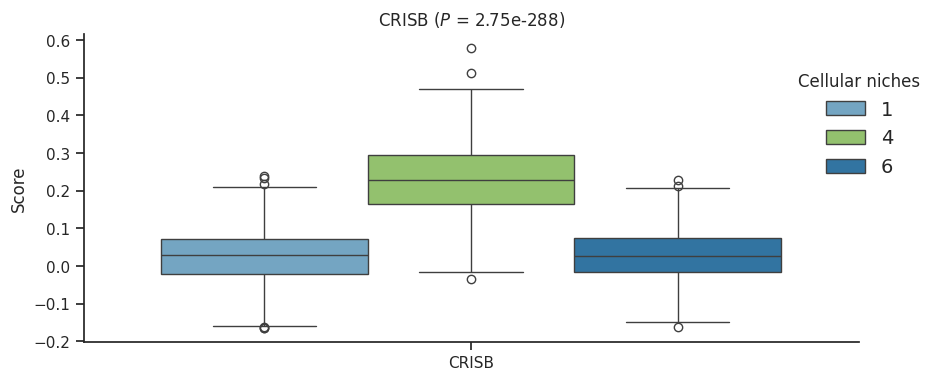

In [9]:
results_kruskal_test = dict()
for c2p in df_melt['Gene signatures'].unique():
    print("--", c2p)
    df_melt_c2p = df_melt[df_melt['Gene signatures']==c2p].copy()
    df_melt_c2p.segmentation_labels = df_melt_c2p.segmentation_labels.astype('int').astype('category')
    
    statistic, pval = stats.kruskal(
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==1]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==4]['Score'],
                                    df_melt_c2p[df_melt_c2p['segmentation_labels']==6]['Score'],
                  )
    print(statistic, pval)
    results_kruskal_test[c2p] = (statistic, pval)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
    sns.boxplot(data=df_melt_c2p,
                x="Gene signatures", 
                y="Score", 
                hue="segmentation_labels",
                palette=palette_subset,
                ax=ax,
                #flierprops={"marker": "o", "markerfacecolor": "None"}
               )
    ax.legend(
              bbox_to_anchor=(1.09, 0.9), 
              loc='upper right',
              fontsize=14,
              facecolor="white",
              edgecolor="white",
              ncol=1,
              borderaxespad=0.0,
              framealpha=0,
              frameon=False,
             )
    ax.set_title(r"{} ($P$ = {:0.2e})".format(c2p, results_kruskal_test[c2p][1]))
    ax.set_xlabel('')
    
            
    # Modify the legend to remove the frame
    legend = ax.get_legend()
    legend.set_title("Cellular niches")
    legend.set_frame_on(False)
    
    sns.despine()
    plt.savefig(FIG2SAVE.joinpath(f"Boxplot_gene_signature_cellular_neighbourhoods_{c2p}.pdf"), 
                dpi=DPI, format="pdf", 
                bbox_inches="tight")
    plt.show()


In [10]:
results_kruskal_test

{'MP6 Hypoxia': (645.4996355366493, 6.784769656884594e-141),
 'MP12 EMT-I': (834.1309098540878, 7.426331519764345e-182),
 'MP13 EMT-II': (1462.3923575416975, 0.0),
 'MP14 EMT-III ': (1193.8330288632933, 5.786975256076803e-260),
 'MP15 EMT IV': (840.3923276503447, 3.2443278438019347e-183),
 'MP17 Interferon': (1011.5458620060872, 2.216189889998762e-220),
 'MP18 Interferon': (1201.495637212216, 1.2546926790405146e-261),
 'EpiHR': (993.6732794584732, 1.684957527874159e-216),
 'TME_HR': (1320.2372507937926, 2.0612163967521952e-287),
 'CRISB': (1324.263887928908, 2.7526465145653515e-288)}

In [11]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/public/Visium_Ozato_2023/cell2loc_spatialde2/concat-no_normal/microenvs_geneexp/gene_signatures/figures')

In [12]:
results_dunn_test = dict()
for c in df_melt['Gene signatures'].unique():
    print("--", c)
    tmp_df = df_melt[df_melt['Gene signatures']==c].copy()
    
    data = [tmp_df[tmp_df['segmentation_labels']==1]['segmentation_labels'].rename('1'),
            tmp_df[tmp_df['segmentation_labels']==4]['segmentation_labels'].rename('4'),
            tmp_df[tmp_df['segmentation_labels']==6]['segmentation_labels'].rename('6'),
            #tmp_df[tmp_df['segmentation_labels']==7]['Cell abundance'].rename('7')
           ]
    
    # Using the posthoc_dunn() function
    p_values = scikit_posthocs.posthoc_dunn(data, p_adjust='fdr_by')
    print(p_values)
    results_dunn_test[c] = p_values

-- MP6 Hypoxia
               1              2             3
1   1.000000e+00  1.489206e-180  0.000000e+00
2  1.489206e-180   1.000000e+00  1.705612e-79
3   0.000000e+00   1.705612e-79  1.000000e+00
-- MP12 EMT-I
               1              2             3
1   1.000000e+00  1.489206e-180  0.000000e+00
2  1.489206e-180   1.000000e+00  1.705612e-79
3   0.000000e+00   1.705612e-79  1.000000e+00
-- MP13 EMT-II
               1              2             3
1   1.000000e+00  1.489206e-180  0.000000e+00
2  1.489206e-180   1.000000e+00  1.705612e-79
3   0.000000e+00   1.705612e-79  1.000000e+00
-- MP14 EMT-III 
               1              2             3
1   1.000000e+00  1.489206e-180  0.000000e+00
2  1.489206e-180   1.000000e+00  1.705612e-79
3   0.000000e+00   1.705612e-79  1.000000e+00
-- MP15 EMT IV
               1              2             3
1   1.000000e+00  1.489206e-180  0.000000e+00
2  1.489206e-180   1.000000e+00  1.705612e-79
3   0.000000e+00   1.705612e-79  1.000000e+00
-- M